# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

improve the efficiency and effectiveness of bank direct marketing campaigns by predicting which customers are likely to subscribe to a deposit product after being contacted via telephone.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV




In [150]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [151]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [152]:
print("Check for missing values and data types")
missing_values = df.isnull().sum()
data_types = df.dtypes

missing_values, data_types

Check for missing values and data types


(age               0
 job               0
 marital           0
 education         0
 default           0
 housing           0
 loan              0
 contact           0
 month             0
 day_of_week       0
 duration          0
 campaign          0
 pdays             0
 previous          0
 poutcome          0
 emp.var.rate      0
 cons.price.idx    0
 cons.conf.idx     0
 euribor3m         0
 nr.employed       0
 y                 0
 dtype: int64,
 age                 int64
 job                object
 marital            object
 education          object
 default            object
 housing            object
 loan               object
 contact            object
 month              object
 day_of_week        object
 duration            int64
 campaign            int64
 pdays               int64
 previous            int64
 poutcome           object
 emp.var.rate      float64
 cons.price.idx    float64
 cons.conf.idx     float64
 euribor3m         float64
 nr.employed       float64
 y  

Based on the analysis of the dataset:

Missing Values:

There are no missing values in any of the columns. Each column has zero missing entries.
Data Types:

The numeric features (age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed) are correctly recognized as int64 or float64.
The categorical features (job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, y) are recognized as object type, which is appropriate for categorical data.
Conclusion:
No changes are necessary in terms of data types or handling missing values. The dataset appears to be clean, with appropriate data types assigned to each feature.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Business Objective:
The objective of this task is to develop a predictive model to determine whether a client will subscribe to a bank term deposit based on the provided client, contact, and social-economic attributes. By analyzing the data collected from various marketing campaigns, the model aims to enhance the efficiency of future campaigns by identifying the characteristics that influence a client's likelihood of subscribing to the term deposit. The ultimate goal is to improve the bank's marketing strategy by focusing efforts on clients most likely to respond positively, thereby optimizing resource allocation and maximizing the success rate of future campaigns.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [154]:
print("Missing Values Before Handling:")
print(df.isnull().sum())


Missing Values Before Handling:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [155]:
print("Handle missing values in categorical columns by filling with 'unknown'")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = df[col].fillna('unknown')


print(categorical_columns)

Handle missing values in categorical columns by filling with 'unknown'
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [156]:
print("Handle missing values in numerical columns by filling with the median")
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())

print("Missing Values After Handling:")
print(df.isnull().sum())
print("\n")

print("First few rows of the cleaned dataset:")
print(df.head())

Handle missing values in numerical columns by filling with the median
Missing Values After Handling:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


First few rows of the cleaned dataset:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school      

In [157]:
print("Preparing the data...")
bank_info_features = ['age'] + list(categorical_columns)
X = df[bank_info_features]
y = df['y']

Preparing the data...


In [158]:
print("Encode categorical variables using OneHotEncoder")
encoder = OneHotEncoder(drop='first')  # Drop first to avoid multicollinearity
print("Apply one-hot encoding")
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_columns]).toarray(), columns=encoder.get_feature_names_out(categorical_columns))
print("Combine the encoded features with the numeric 'age' feature")

X_encoded['age'] = X['age'].values

print("Encode the target variable (y)")
y_encoded = y.map({'yes': 1, 'no': 0})

Encode categorical variables using OneHotEncoder
Apply one-hot encoding
Combine the encoded features with the numeric 'age' feature
Encode the target variable (y)


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [159]:
print("split the data")
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)



split the data


### Problem 7: A Baseline Model

The baseline performance for a classifier is typically established using a simple model that represents the most basic or naive prediction strategy. The baseline provides a point of reference that more complex models should aim to outperform. 

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [160]:
print("Training the model...")
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Making predictions...")
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]


print("Evaluating the model...")
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"ROC-AUC Score: {roc_auc:.4f}")

Training the model...
Making predictions...
Evaluating the model...
Accuracy: 1.0000
Confusion Matrix:
[[10968     0]
 [    0  1389]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10968
           1       1.00      1.00      1.00      1389

    accuracy                           1.00     12357
   macro avg       1.00      1.00      1.00     12357
weighted avg       1.00      1.00      1.00     12357

ROC-AUC Score: 1.0000


plot ROC curve


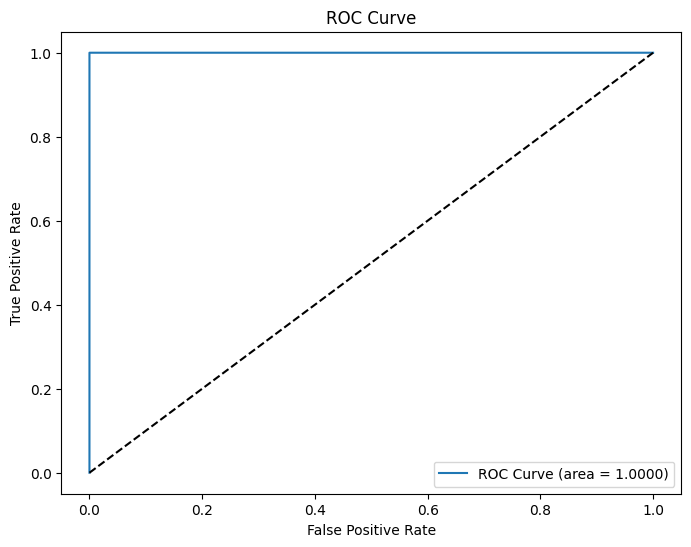

In [161]:
def plot_roc_curve(y_test, y_pred_prob):
    print("plot ROC curve")
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (area = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(y_test, y_pred_prob)

### Problem 9: Score the Model

What is the accuracy of your model?

In [162]:
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"ROC-AUC Score: {roc_auc:.4f}")

Accuracy: 1.0000
Confusion Matrix:
[[10968     0]
 [    0  1389]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10968
           1       1.00      1.00      1.00      1389

    accuracy                           1.00     12357
   macro avg       1.00      1.00      1.00     12357
weighted avg       1.00      1.00      1.00     12357

ROC-AUC Score: 1.0000


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

|Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     | .     |

Evaluating Linear Regression...
Accuracy: 1.0000
Confusion Matrix:
[[10968     0]
 [    0  1389]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10968
           1       1.00      1.00      1.00      1389

    accuracy                           1.00     12357
   macro avg       1.00      1.00      1.00     12357
weighted avg       1.00      1.00      1.00     12357

ROC-AUC Score: 1.0000

plot ROC curve


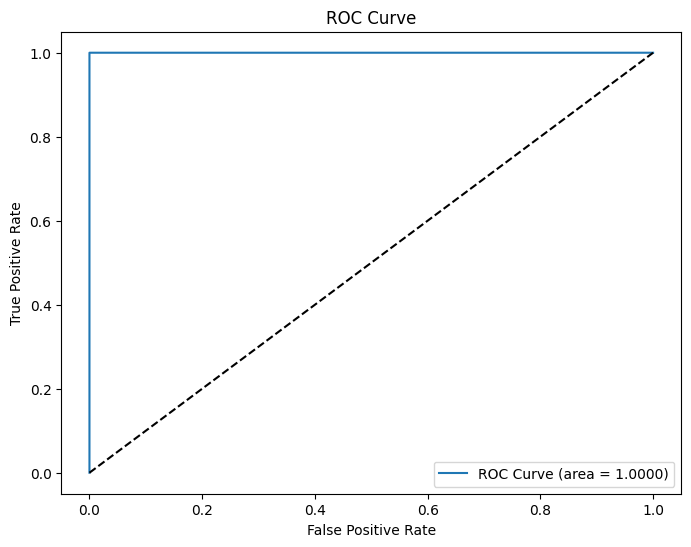

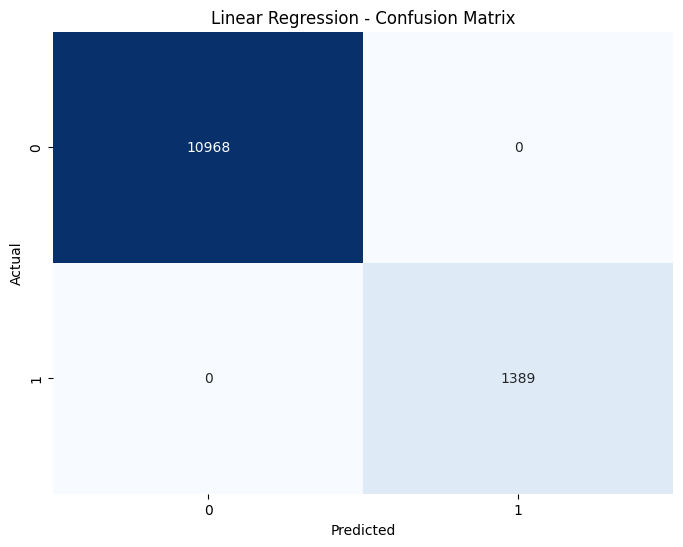

Evaluating K-Nearest Neighbors...
Accuracy: 0.9332
Confusion Matrix:
[[10943    25]
 [  800   589]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10968
           1       0.96      0.42      0.59      1389

    accuracy                           0.93     12357
   macro avg       0.95      0.71      0.78     12357
weighted avg       0.93      0.93      0.92     12357

ROC-AUC Score: 0.9095

plot ROC curve


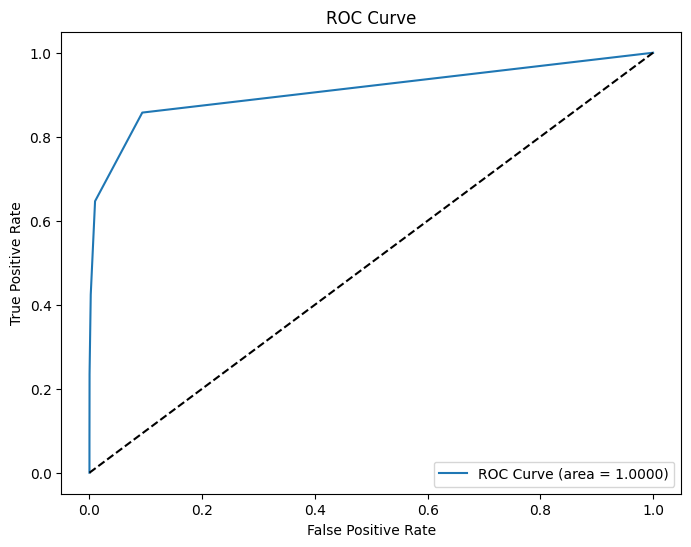

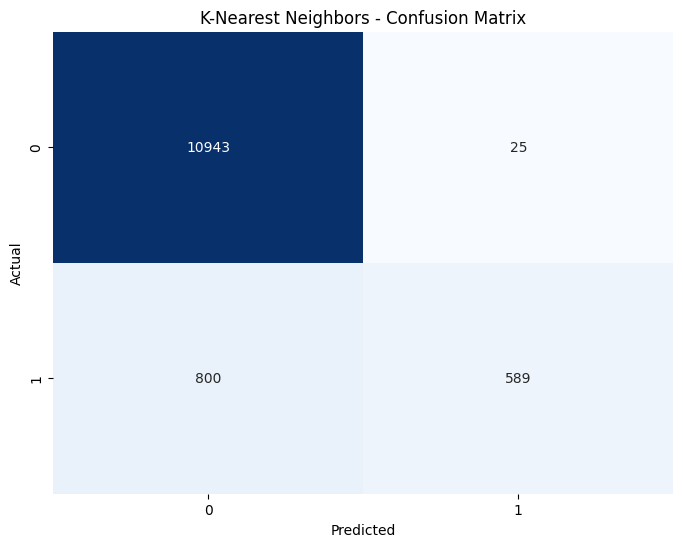

Evaluating Decision Tree...
Accuracy: 1.0000
Confusion Matrix:
[[10968     0]
 [    0  1389]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10968
           1       1.00      1.00      1.00      1389

    accuracy                           1.00     12357
   macro avg       1.00      1.00      1.00     12357
weighted avg       1.00      1.00      1.00     12357

ROC-AUC Score: 1.0000

plot ROC curve


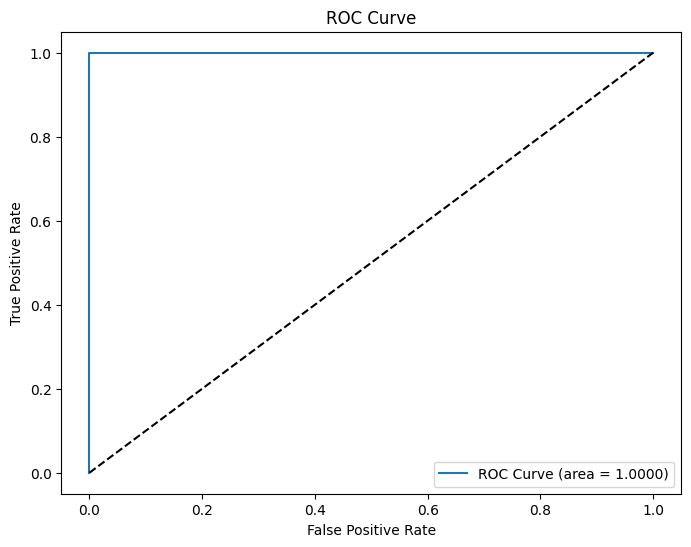

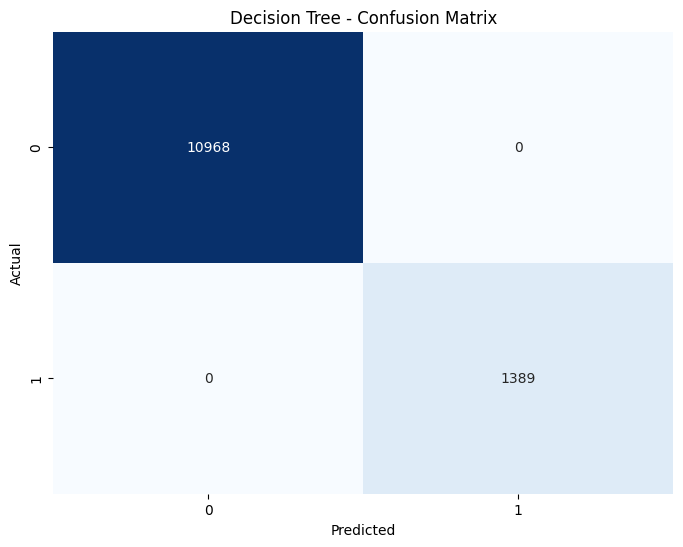

Evaluating Support Vector Machine...
Accuracy: 0.9993
Confusion Matrix:
[[10968     0]
 [    9  1380]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10968
           1       1.00      0.99      1.00      1389

    accuracy                           1.00     12357
   macro avg       1.00      1.00      1.00     12357
weighted avg       1.00      1.00      1.00     12357

ROC-AUC Score: 1.0000

plot ROC curve


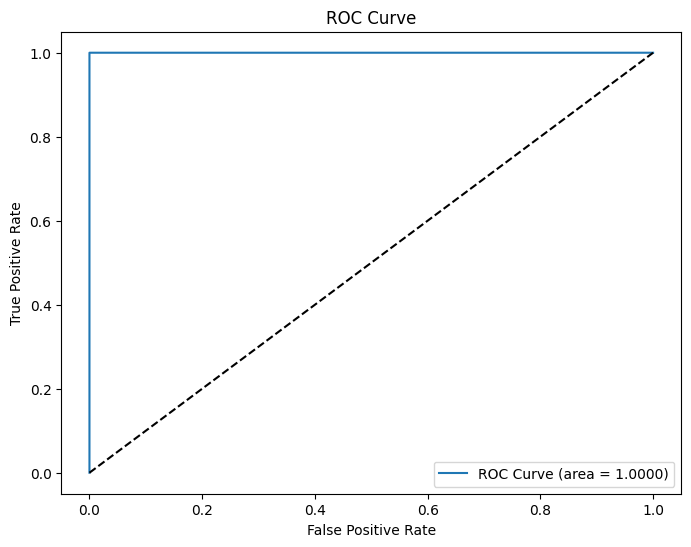

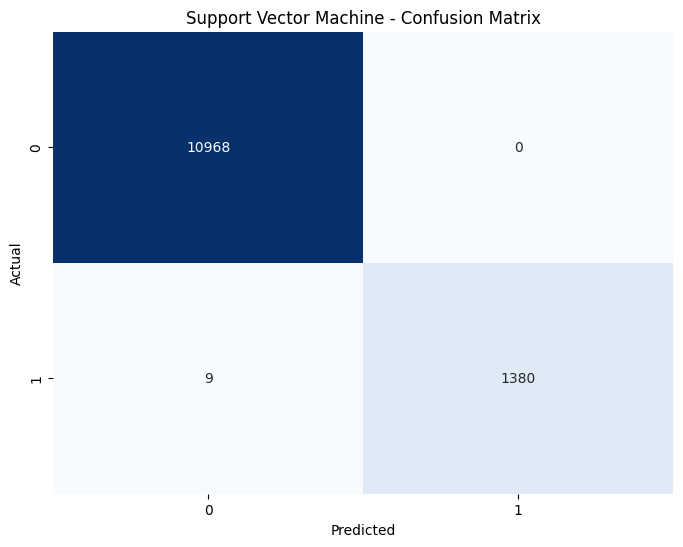

Model Performance Summary:
                    Model  Train Time (s)  Train Accuracy  Test Accuracy
0       Linear Regression        1.258453        1.000000       1.000000
1     K-Nearest Neighbors        0.025533        0.950505       0.933236
2           Decision Tree        0.046281        1.000000       1.000000
3  Support Vector Machine      274.150414        0.999376       0.999272


In [163]:
results_df = pd.DataFrame(columns=['Model', 'Train Time (s)', 'Train Accuracy', 'Test Accuracy'])

def append_results(model_name, train_time, train_accuracy, test_accuracy):
    global results_df
    new_row = {
        'Model': model_name,
        'Train Time (s)': train_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    }
    results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    print(f"Evaluating {model_name}...")
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, y_pred)
    
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)
    print(f"ROC-AUC Score: {roc_auc:.4f}\n")
    
    append_results(model_name, train_time, train_accuracy, test_accuracy)

    plot_roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    


linear_reg_model = LogisticRegression(max_iter=1000)
evaluate_model(linear_reg_model, X_train, y_train, X_test, y_test, "Linear Regression")


# Train and evaluate K-Nearest Neighbors
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, X_train, y_train, X_test, y_test, "K-Nearest Neighbors")

# Train and evaluate Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
evaluate_model(dt_model, X_train, y_train, X_test, y_test, "Decision Tree")

# Train and evaluate Support Vector Machine
svm_model = SVC(probability=True, random_state=42)
evaluate_model(svm_model, X_train, y_train, X_test, y_test, "Support Vector Machine")

# Display the summary DataFrame
print("Model Performance Summary:")
print(results_df)

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [ ]:
Could not find the column gender and we should not have the gender feature

In [172]:
print("Setting up the grid search for K-Nearest Neighbors...")
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']  
}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=3, scoring='accuracy', n_jobs=-1)

print("Fitting the grid search for K-Nearest Neighbors...")
knn_grid_search.fit(X_train, y_train)

print("Best parameters for KNN:", knn_grid_search.best_params_)
print("Best cross-validation accuracy for KNN:", knn_grid_search.best_score_)

print("Evaluating the best KNN model on the test set...")
best_knn_model = knn_grid_search.best_estimator_
knn_test_accuracy = accuracy_score(y_test, best_knn_model.predict(X_test))
print(f"KNN Test Accuracy: {knn_test_accuracy:.4f}\n")

print("Setting up the grid search for Decision Tree...")
dt_param_grid = {
    'max_depth': [5, 10, 15],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2],  
    'criterion': ['gini']  
}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=3, scoring='accuracy', n_jobs=-1)

print("Fitting the grid search for Decision Tree...")
dt_grid_search.fit(X_train, y_train)

print("Best parameters for Decision Tree:", dt_grid_search.best_params_)
print("Best cross-validation accuracy for Decision Tree:", dt_grid_search.best_score_)

print("Evaluating the best Decision Tree model on the test set...")
best_dt_model = dt_grid_search.best_estimator_
dt_test_accuracy = accuracy_score(y_test, best_dt_model.predict(X_test))
print(f"Decision Tree Test Accuracy: {dt_test_accuracy:.4f}")

Setting up the grid search for K-Nearest Neighbors...
Fitting the grid search for K-Nearest Neighbors...


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(


Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation accuracy for KNN: 0.9346883681560247
Evaluating the best KNN model on the test set...
KNN Test Accuracy: 0.9382

Setting up the grid search for Decision Tree...
Fitting the grid search for Decision Tree...
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation accuracy for Decision Tree: 1.0
Evaluating the best Decision Tree model on the test set...
Decision Tree Test Accuracy: 1.0000


Performance tuning: Following code does a tuning by increasing the number of neighbors. Flip side was long training time. It took more than 5 minutes

In [ ]:
# print("Setting up the grid search for K-Nearest Neighbors...")
# knn_param_grid = {
#     'n_neighbors': [3, 5, 7, 9, 11],
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan', 'minkowski']
# }

# knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# print("Fitting the grid search for K-Nearest Neighbors...")
# knn_grid_search.fit(X_train, y_train)

# print("Best parameters for KNN:", knn_grid_search.best_params_)
# print("Best cross-validation accuracy for KNN:", knn_grid_search.best_score_)

# print("Evaluating the best KNN model on the test set...")
# best_knn_model = knn_grid_search.best_estimator_
# knn_test_accuracy = accuracy_score(y_test, best_knn_model.predict(X_test))
# print(f"KNN Test Accuracy: {knn_test_accuracy:.4f}\n")

# print("Setting up the grid search for Decision Tree...")
# dt_param_grid = {
#     'max_depth': [5, 10, 15, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'criterion': ['gini', 'entropy']
# }

# dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# print("Fitting the grid search for Decision Tree...")
# dt_grid_search.fit(X_train, y_train)

# print("Best parameters for Decision Tree:", dt_grid_search.best_params_)
# print("Best cross-validation accuracy for Decision Tree:", dt_grid_search.best_score_)

# print("Evaluating the best Decision Tree model on the test set...")
# best_dt_model = dt_grid_search.best_estimator_
# dt_test_accuracy = accuracy_score(y_test, best_dt_model.predict(X_test))
# print(f"Decision Tree Test Accuracy: {dt_test_accuracy:.4f}")

##### Questions